In [1]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# loading CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# check shapes
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
# creating the variable for class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

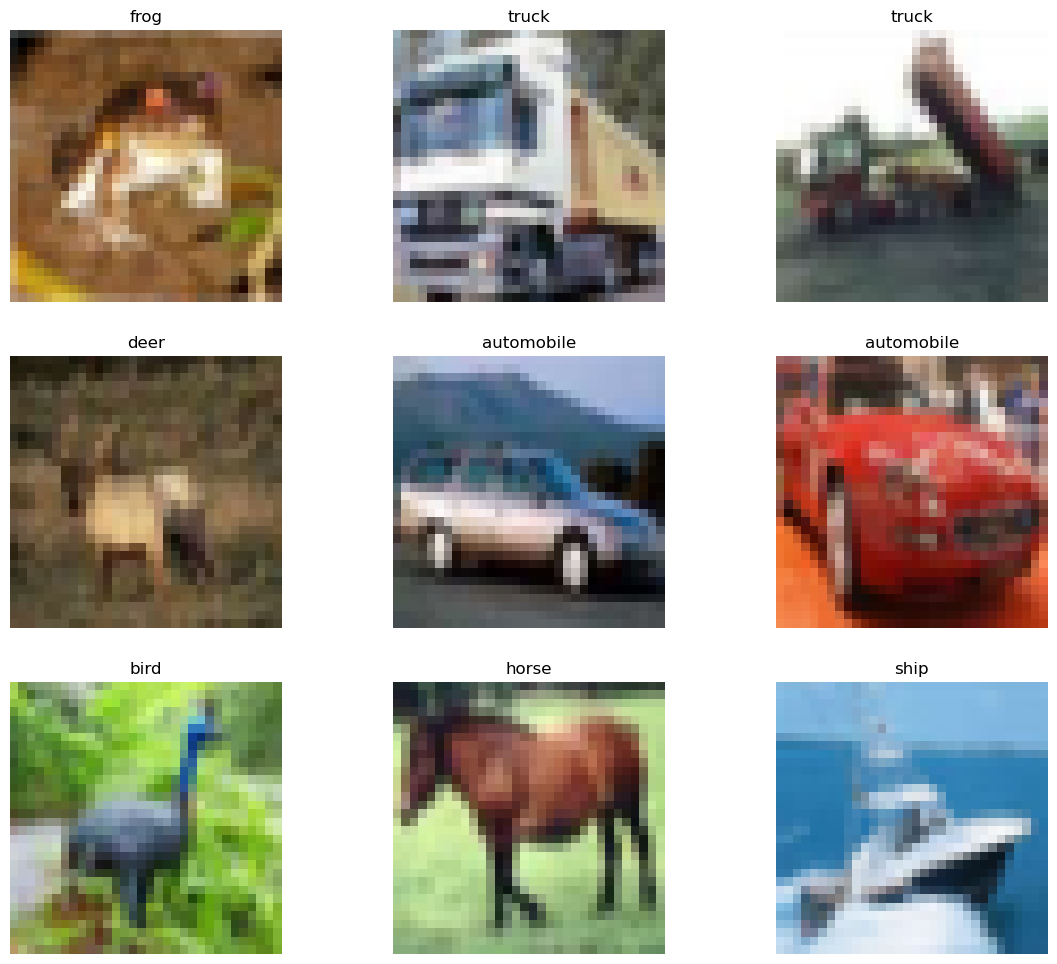

In [5]:
# visualizing a few images 
plt.figure(figsize=(14, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [6]:
# normalizing pixel values
x_train = x_train/255.0
x_test = x_test/255.0


In [7]:
# check
x_train.min() == 0.0
x_train.max() == 1.0

True

In [8]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
generate_data = ImageDataGenerator(rotation_range=15, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
generate_data.fit(x_train)

In [9]:
# convert labels to categorical (one-hot encoding) for multi-class classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
#building a simple CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# training the model
history = model.fit(generate_data.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20


C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.2737 - loss: 1.9376 - val_accuracy: 0.5102 - val_loss: 1.3517
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.4700 - loss: 1.4705 - val_accuracy: 0.5690 - val_loss: 1.2050
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.5255 - loss: 1.3289 - val_accuracy: 0.6047 - val_loss: 1.0985
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5578 - loss: 1.2422 - val_accuracy: 0.6303 - val_loss: 1.0798
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5731 - loss: 1.2041 - val_accuracy: 0.6392 - val_loss: 1.0203
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.5941 - loss: 1.1553 - val_accuracy: 0.6708 - val_loss: 0.9414
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6073 - loss: 1.1229 - val_accuracy: 0.6594 - val_loss: 0.9534
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.6171 - loss: 1.09

In [12]:
# saving model
model.save('cifar10_model.h5')

In [13]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7239 - loss: 0.7979


[0.8014010190963745, 0.7257000207901001]

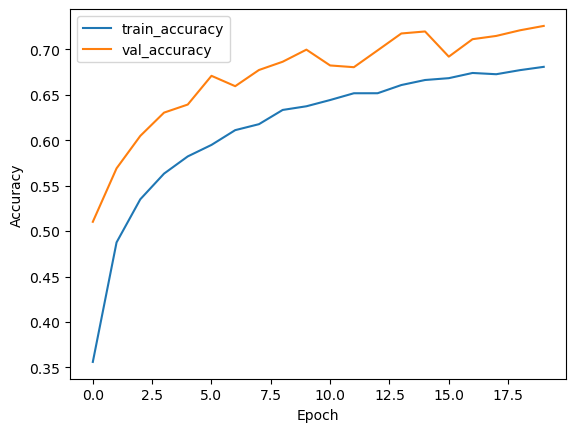

In [14]:
# visualization: plot training/validation loss and accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


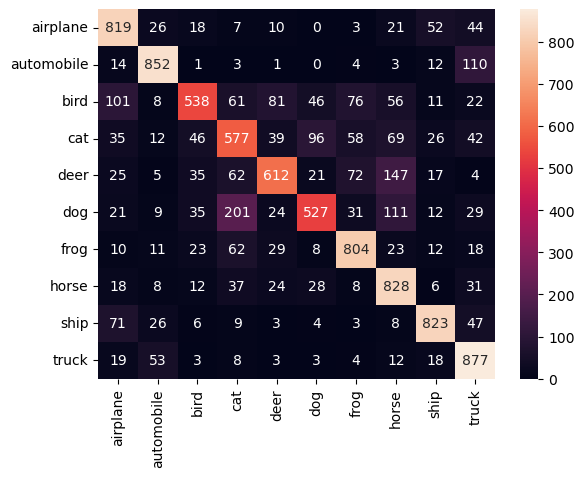

In [15]:
# confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.show()          

In [16]:
# with a case of mild overfitting, I'd want to implement measures to mitigate that, starting with a higher dropout rate
# would restart by data augmentation
generate_data.fit(x_train)

In [17]:
# building a simple CNN, this time with higher dropout and BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(), # new addition
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6), # was previously 0.5...refer back to cell 10
    Dense(10, activation='softmax')
])

C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Recompiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# checking the model summary, just because
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,938 (738.04 KB)

 Trainable params: 188,874 (737.79 KB)

 Non-trainable params: 64 (256.00 B)

In [20]:
# training the model this time with early stopping
from tensorflow import keras  # forgot to import keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
history_wes = model.fit(generate_data.flow(x_train, y_train, batch_size=32),
                        epochs=50, # increased epochs with early stopping involved
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping])

Epoch 1/50


C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3152 - loss: 1.8622 - val_accuracy: 0.2797 - val_loss: 2.3549
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.4736 - loss: 1.4572 - val_accuracy: 0.5767 - val_loss: 1.1789
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.5359 - loss: 1.3136 - val_accuracy: 0.5137 - val_loss: 1.4345
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5736 - loss: 1.2221 - val_accuracy: 0.5784 - val_loss: 1.1858
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.5973 - loss: 1.1671 - val_accuracy: 0.6289 - val_loss: 1.0765
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.6103 - loss: 1.1297 - val_accuracy: 0.6540 - val_loss: 1.0085
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6278 - loss: 1.0867 - val_accuracy: 0.6669 - val_loss: 0.9593
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.6383 - loss: 1.05

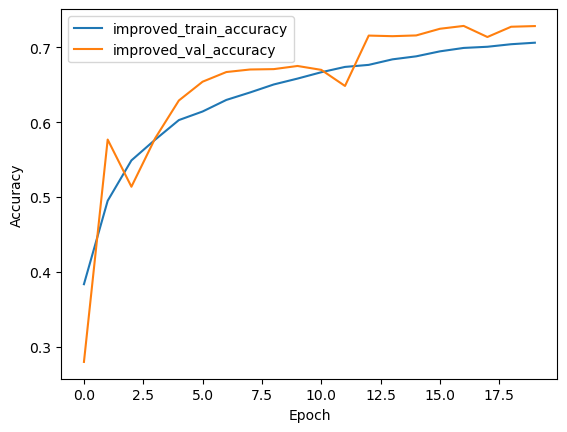

In [21]:
plt.plot(history_wes.history['accuracy'], label='improved_train_accuracy')
plt.plot(history_wes.history['val_accuracy'], label='improved_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Improved Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7275 - loss: 0.8110
Improved Test Accuracy: 0.73


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


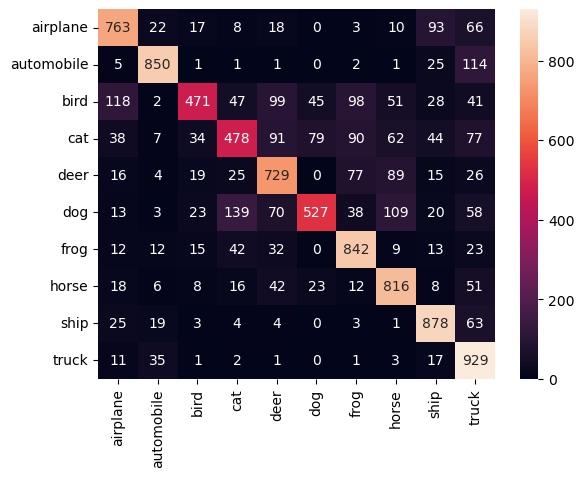

In [23]:
# confusion matrix after mild overfitting correction
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.show()

In [51]:
# now I will use this model on a dataset i gathered on kaggle 
import os
import pickle

In [53]:
import numpy as np
from tensorflow import keras

In [59]:
data_dir = "cifar-10-batches-py" # filepath is stored directly in my user

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test_new shape: (10000, 32, 32, 3)
y_test_new shape: (10000, 10)
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7275 - loss: 0.8110
Test Accuracy on New Dataset: 0.73
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


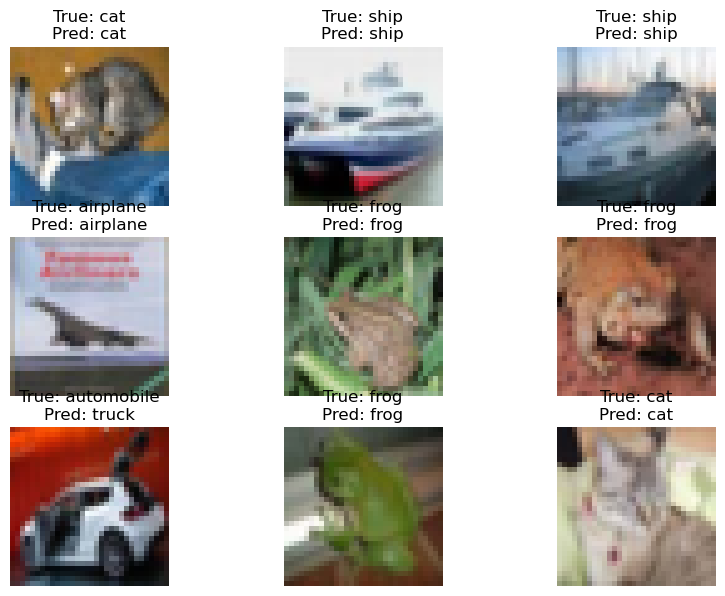

In [79]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# load training batches
train_data = []
train_labels = []
for i in range(1, 6):
    batch_file = os.path.join(data_dir, f'data_batch_{i}')
    batch = unpickle(batch_file)
    train_data.append(batch[b'data'])
    train_labels.append(batch[b'labels'])

x_train = np.concatenate(train_data, axis=0)
y_train = np.concatenate(train_labels, axis=0)

# load test batch
test_batch = unpickle(os.path.join(data_dir, 'test_batch'))
x_test_new = test_batch[b'data']
y_test_new = np.array(test_batch[b'labels'])

# reshape and preprocess
x_train = x_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
x_test_new = x_test_new.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
x_train = x_train.astype('float32') / 255.0
x_test_new = x_test_new.astype('float32') / 255.0

# convert labels to categorical (optional, matches your model)
y_train = keras.utils.to_categorical(y_train, 10)
y_test_new = keras.utils.to_categorical(y_test_new, 10)

# Verify shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test_new shape: {x_test_new.shape}")
print(f"y_test_new shape: {y_test_new.shape}")

# evaluate on new test set
test_loss_new, test_accuracy_new = model.evaluate(x_test_new, y_test_new)
print(f"Test Accuracy on New Dataset: {test_accuracy_new:.2f}")

# predict and visualize
predictions = model.predict(x_test_new)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_new, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test_new[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.show()